In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_18686/2011421623.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('Mall_Customers.csv', sep=',', header=0)

In [5]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

In [16]:
# Check if we have duplicated CustomerID's to find possible errors in the dataset
df['CustomerID'].value_counts()

CustomerID
1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: count, Length: 200, dtype: int64

In [29]:
print(df['Gender'].unique())
print(df['Age'].unique())
print(df['Annual Income (k$)'].unique())
print(df['Spending Score (1-100)'].unique())

['Male' 'Female']
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


<Axes: xlabel='Spending Score (1-100)'>

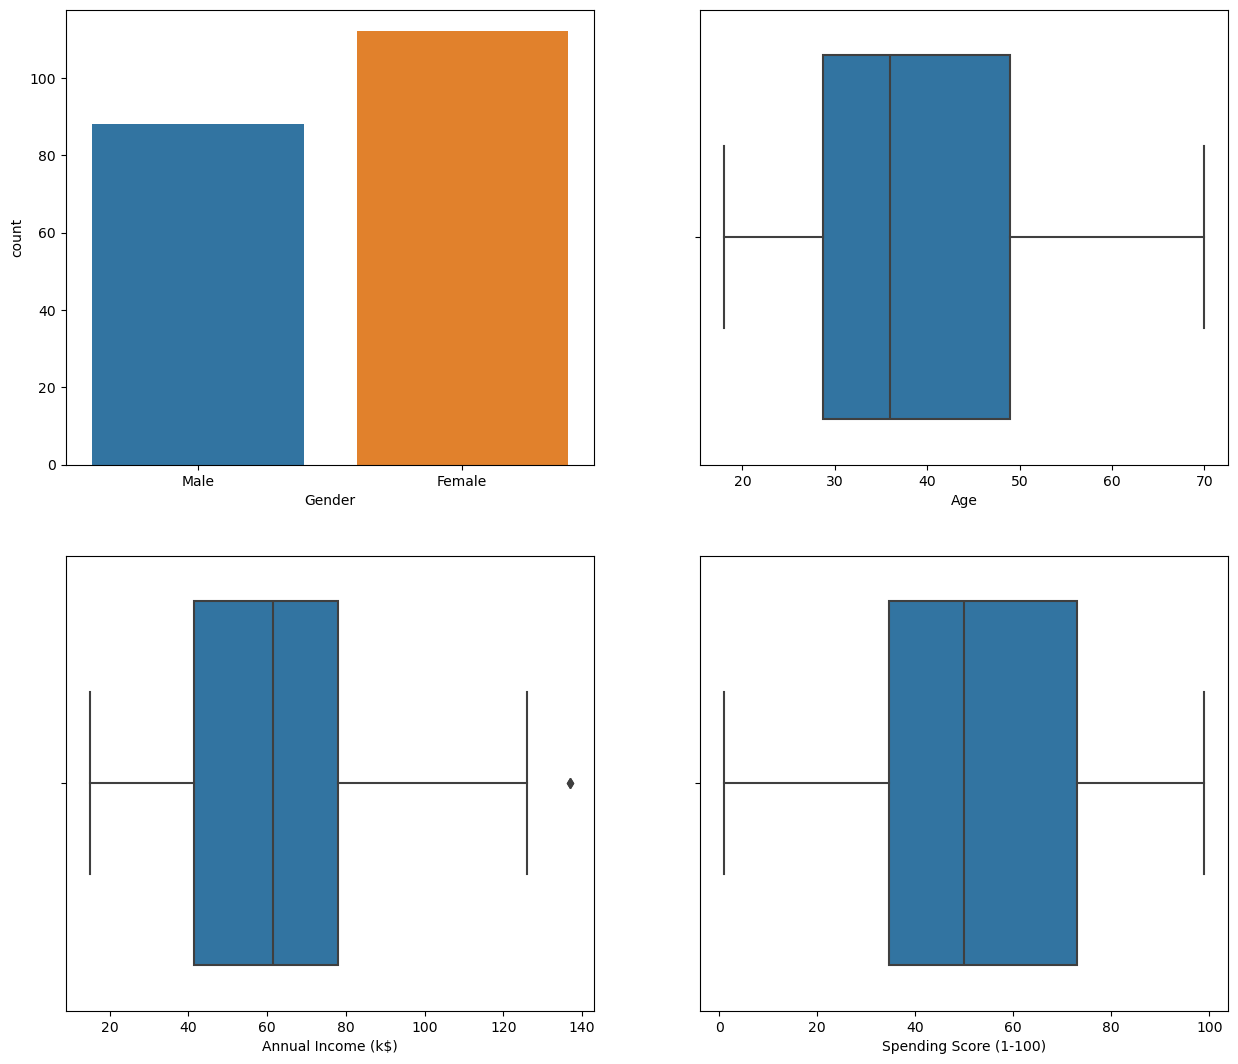

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(15, 13))
sns.countplot(x='Gender', data=df, ax=ax[0, 0])
sns.boxplot(x='Age', data=df, ax=ax[0, 1])
sns.boxplot(x='Annual Income (k$)', data=df, ax=ax[1, 0])
sns.boxplot(x='Spending Score (1-100)', data=df, ax=ax[1, 1])


/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/johnloyal/miniconda3/envs/ds/lib/python

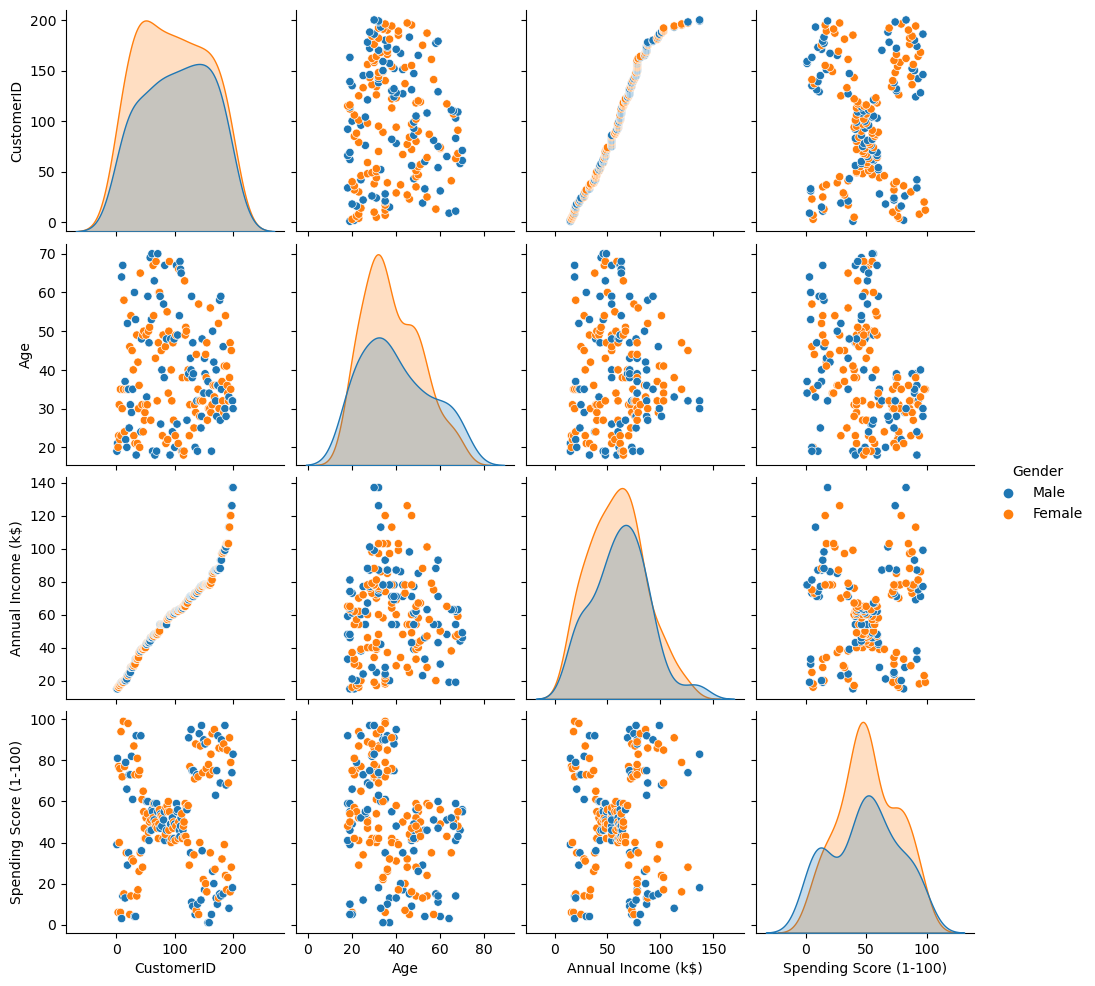

In [27]:
sns.pairplot(data=df, hue='Gender')

# Pre-processing

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

In [32]:
# CustomerID shouldn't be a variable that gives information about the customer spending since it is a value that is given to the customer. 
df.drop(columns=['CustomerID'], inplace=True)

# Clustering with K-means

In [47]:
# Age and Spending Score (1-100
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

lloyd_inertia = []
for n in range(1 , 11):
    lloyd_algorithm = KMeans(n_clusters=n, init='k-means++', n_init='auto', max_iter=300, tol=0.0001,  random_state= 42, algorithm='lloyd')
    lloyd_algorithm.fit(X1)
    lloyd_inertia.append(lloyd_algorithm.inertia_)

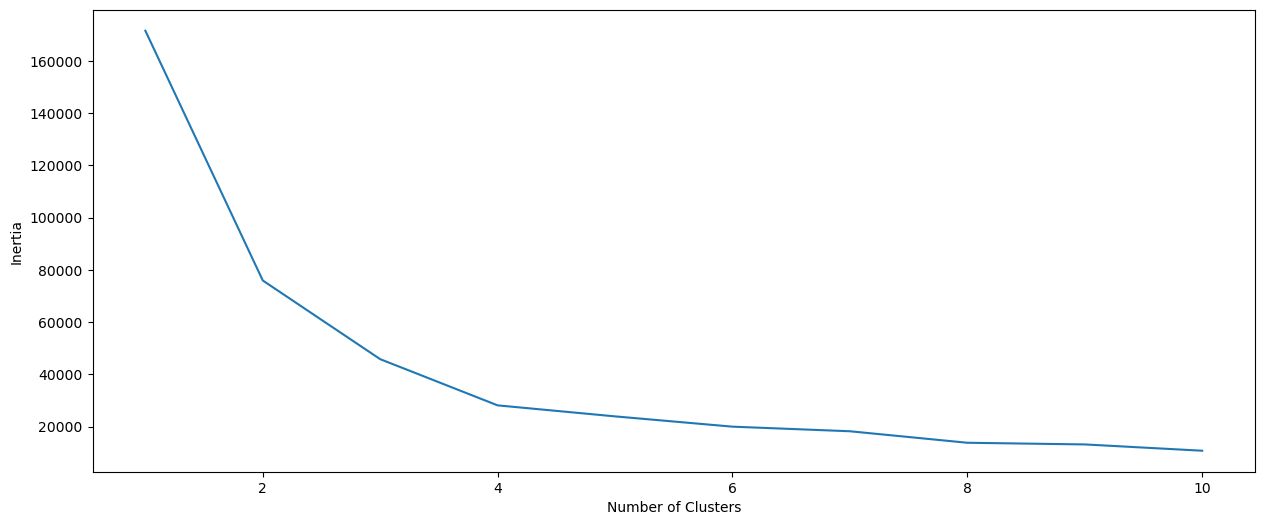

In [49]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , lloyd_inertia , '-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [66]:
age_spending_algorithm = KMeans(n_clusters=4, init='k-means++', n_init='auto', max_iter=300, tol=0.0001,  random_state=42, algorithm='lloyd')
age_spending_algorithm.fit(X1)
age_spending_labels = age_spending_algorithm.labels_
age_spending_centroids = age_spending_algorithm.cluster_centers_

In [54]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = age_spending_algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

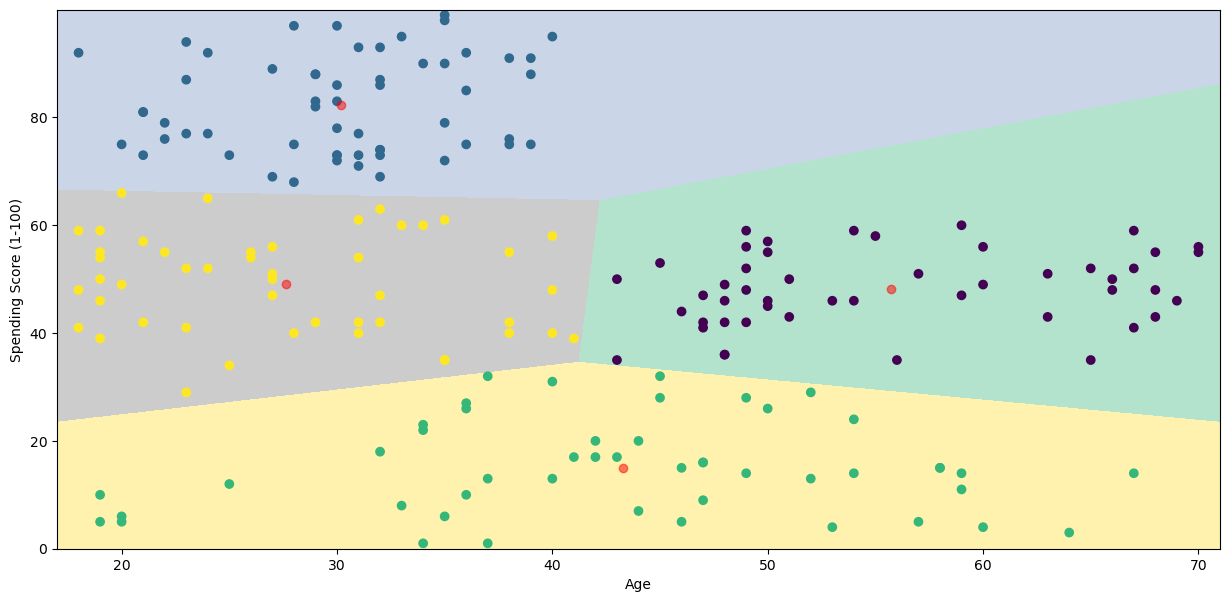

In [72]:
plt.figure(1 , figsize = (15 , 7))
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x='Age', y='Spending Score (1-100)', data=df, c=age_spending_labels)
plt.scatter(x = age_spending_centroids[: , 0], y=age_spending_centroids[: , 1], c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [73]:
# Age and Annual Income (k$)
X1 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

lloyd_inertia = []
for n in range(1 , 11):
    lloyd_algorithm = KMeans(n_clusters=n, init='k-means++', n_init='auto', max_iter=300, tol=0.0001,  random_state= 42, algorithm='lloyd')
    lloyd_algorithm.fit(X1)
    lloyd_inertia.append(lloyd_algorithm.inertia_)

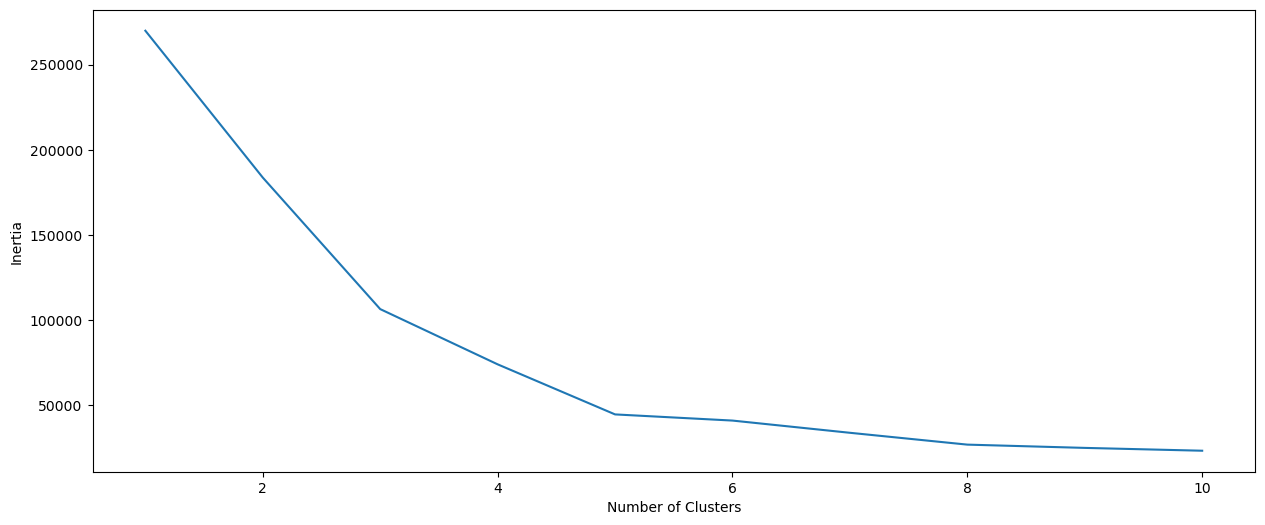

In [74]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , lloyd_inertia , '-')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [76]:
annual_inc_spending_algorithm = KMeans(n_clusters=5, init='k-means++', n_init='auto', max_iter=300, tol=0.0001,  random_state=42, algorithm='lloyd')
annual_inc_spending_algorithm.fit(X1)
annual_inc_spending_labels = annual_inc_spending_algorithm.labels_
annual_inc_spending_centroids = annual_inc_spending_algorithm.cluster_centers_

In [77]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = annual_inc_spending_algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

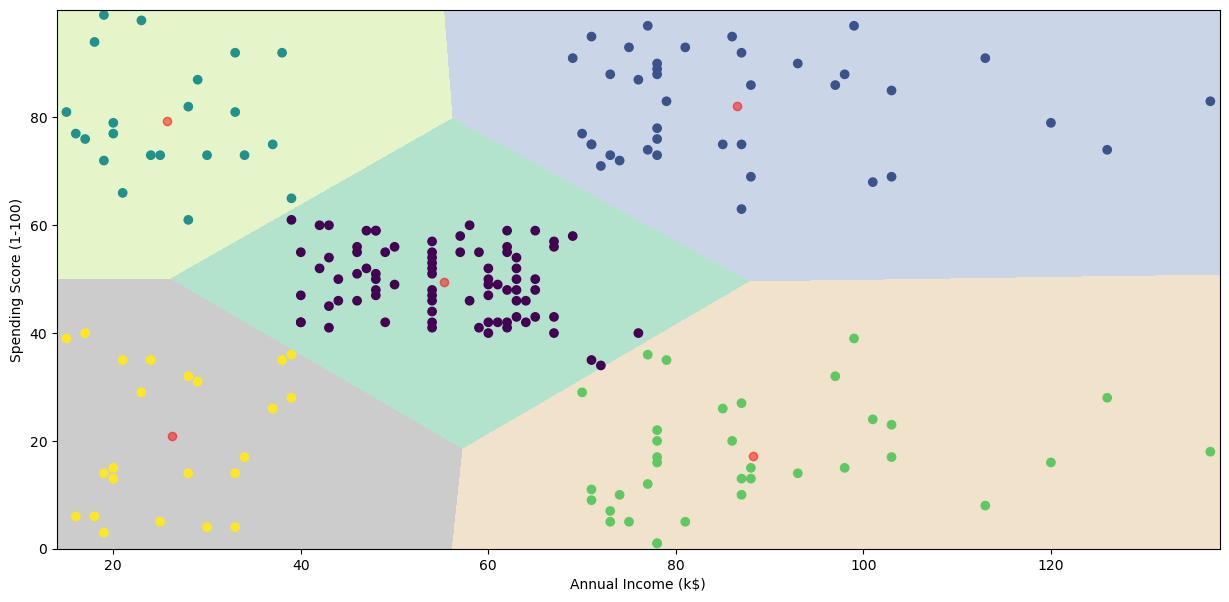

In [88]:
plt.figure(1 , figsize = (15 , 7))
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=annual_inc_spending_labels)
plt.scatter(x = annual_inc_spending_centroids[: , 0], y=annual_inc_spending_centroids[: , 1], c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()